# 오픈데이터 활용

## 재미있는 사이트, Kaggle.com¶
> URL : https://www.kaggle.com/

타이타닉 데이터
> 알고있는 가설을 전제로 확인해보자

> - 가정1 : "실제 어린 아이들이 많이 생존했나? "
- 가정2 : "객실등급 1등급 인 사람들이 많이 살았다."
- 가정3 : "남자, 여자"

Datasets 다운 : data/taitanic_train.csv
> - 과제1 : 남자/여자 수, 객실 등급별 수
- 과제2 : 연령대별 수 ( 10대 : OO명, 20대 : OO명, 30대 : OO명 )
- 과제3 : 남여별/객실등급별 생존자수를 그래프로 표현

In [ ]:
Data Description
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### 데이터 다운로드 및 분석

In [48]:
df = pd.read_csv("data/train.csv")

In [49]:
df.head(10)      # Pclass: 객실등급, 성별, 나이, 생존 여부

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [50]:
len(df)

891

- 과제1 : 남자/여자 수, 객실 등급별 수



\# 결과값 예측

result = {
    "male" : 0,
    "female" : 0
}

result = {
    1 : 0,
    2 : 0,
    3 : 0
}


In [51]:
type(df['Sex'])

pandas.core.series.Series

In [52]:
len(df['Sex'])

891

In [53]:
df['Sex']

0        male
1      female
2      female
3      female
4        male
5        male
6        male
7        male
8      female
9      female
10     female
11     female
12       male
13       male
14     female
15     female
16       male
17       male
18     female
19     female
20       male
21       male
22     female
23       male
24     female
25     female
26       male
27       male
28     female
29       male
        ...  
861      male
862    female
863    female
864      male
865    female
866    female
867      male
868      male
869      male
870      male
871    female
872      male
873      male
874    female
875    female
876      male
877      male
878      male
879    female
880    female
881      male
882    female
883      male
884      male
885    female
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [54]:
df['Sex'][1:5]

1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [55]:
from functools import reduce

def get_group_count(df_column):
    
    def count_columns(result_dic, element):
        if result_dic.get(element):
            result_dic[element] += 1
        else:
            result_dic[element] = 1
        
        return result_dic
    
    result = reduce(count_columns, df_column, dict())
    return result

In [56]:
reesult = get_group_count(df['Sex'])
reesult

{'male': 577, 'female': 314}

In [57]:
reesult = get_group_count(df["Pclass"])
reesult

{3: 491, 1: 216, 2: 184}

In [58]:
len(df['Sex'][df.Sex == 'female'])

314

In [59]:
len(df['Pclass'][df.Pclass == 1])

216

In [60]:
len(df)

891

In [61]:
idx = 0
df_columns = []
element = df['Sex'][idx], df['Pclass'][idx]
df_columns.append(element)
df_columns

[('male', 3)]

In [62]:
df_columns = []
for idx in range(len(df)):
    element = df['Sex'][idx], df["Pclass"][idx]
    df_columns.append(element)

In [63]:
len(df_columns), df_columns[:5]

(891, [('male', 3), ('female', 1), ('female', 3), ('female', 1), ('male', 3)])

In [153]:
w = 100
h = 200
area = w * h
area

20000

In [157]:
data = (100, 200)
w, h = data
w, h

(100, 200)

In [150]:
def get_group_count(df_columns) :
    
    print('len(df_columns) :', len(df_columns))
    
    def count_columns(result_dic, element_tuple) :
        element1, element2 = element_tuple
#         (element1, element2) = element_tuple
#         element_tuple = (element1, element2) 
#         print(element1, ':', element2)
        print(element_tuple)
        
        if not (result_dic.get(element1)) :     # male, female 분류 기능
            result_dic[element1] = {}     
              
        if result_dic[element1].get(element2) :
            result_dic[element1][element2] += 1
        else :
            result_dic[element1][element2] = 1

        return result_dic
    
    result = reduce(count_columns, df_columns, dict())
    return result

In [151]:
result = get_group_count(df_columns)
result

len(df_columns) : 891
('male', 3)
('female', 1)
('female', 3)
('female', 1)
('male', 3)
('male', 3)
('male', 1)
('male', 3)
('female', 3)
('female', 2)
('female', 3)
('female', 1)
('male', 3)
('male', 3)
('female', 3)
('female', 2)
('male', 3)
('male', 2)
('female', 3)
('female', 3)
('male', 2)
('male', 2)
('female', 3)
('male', 1)
('female', 3)
('female', 3)
('male', 3)
('male', 1)
('female', 3)
('male', 3)
('male', 1)
('female', 1)
('female', 3)
('male', 2)
('male', 1)
('male', 1)
('male', 3)
('male', 3)
('female', 3)
('female', 3)
('female', 3)
('female', 2)
('male', 3)
('female', 2)
('female', 3)
('male', 3)
('male', 3)
('female', 3)
('male', 3)
('female', 3)
('male', 3)
('male', 3)
('female', 1)
('female', 2)
('male', 1)
('male', 1)
('female', 2)
('male', 3)
('female', 2)
('male', 3)
('male', 3)
('female', 1)
('male', 1)
('male', 3)
('male', 1)
('male', 3)
('female', 2)
('male', 3)
('female', 3)
('male', 3)
('male', 2)
('female', 3)
('male', 2)
('male', 3)
('male', 3)
('male', 3)


{'male': {3: 347, 1: 122, 2: 108}, 'female': {1: 94, 3: 144, 2: 76}}

In [91]:
dict_element = result['female']
dict_element

{1: 94, 3: 144, 2: 76}

In [96]:
dict_values = [dict_element[key] for key in dict_element.keys()]
dict_values

[94, 144, 76]

In [97]:
sum(dict_values)

314

In [98]:
count_f = []
count_m = []
for i in range(3):
    idx = i + 1
    count_f.append(result['female'][idx])
    count_m.append(result['male'][idx])

In [99]:
count_f, count_m

([94, 76, 144], [122, 108, 347])

In [100]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)

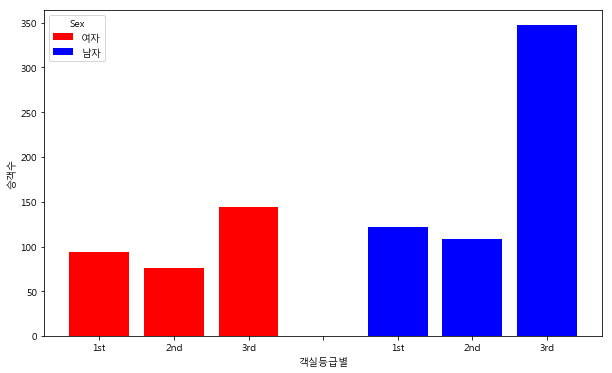

In [102]:
t1 = [1,2,3]
t2 = [5,6,7]

plt.figure(figsize=(10, 6))
plt.bar(t1, count_f, color='r', label='여자')
plt.bar(t2, count_m, color='b', label='남자')
plt.xlabel('객실등급별')
plt.ylabel('승객수')
plt.legend(title='Sex')

t=list(range(1, 8))
plt.xticks(t, ('1st', '2nd', '3rd', '', '1st', '2nd', '3rd'))
 # set the locations of the xticks
plt.show()

In [103]:
count_p1 = count_f[0], count_m[0]
count_p2 = count_f[1], count_m[1]
count_p3 = count_f[2], count_m[2]

count_p1, count_p2, count_p3

((94, 122), (76, 108), (144, 347))

<function matplotlib.pyplot.show(*args, **kw)>

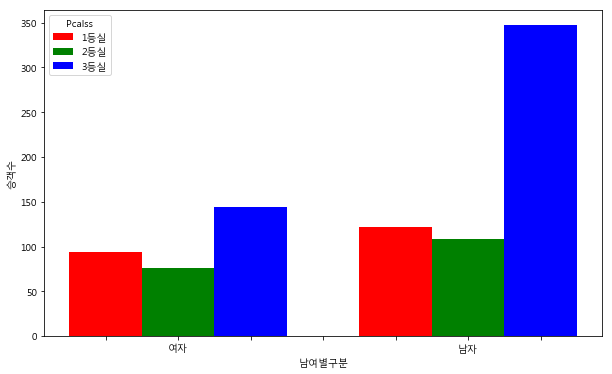

In [104]:
t1 = [1, 5]
t2 = [2, 6]
t3 = [3, 7]

plt.figure(figsize=(10, 6))
plt.bar(t1, count_p1, color='r', width=1, label='1등실')
plt.bar(t2, count_p2, color='g', width=1, label='2등실')
plt.bar(t3, count_p3, color='b', width=1, label='3등실')
plt.xlabel('남여별구분')
plt.ylabel('승객수')
plt.legend(title='Pcalss')

t = list(range(1, 8))
plt.xticks(t,('','여자',"","","",'남자',""))  # set the locations of the xticks
plt.show


In [105]:
from pandas import Series, DataFrame

In [106]:
df_tmp = DataFrame({'Sex': df.Sex, 'Pclass': df.Pclass})
df_tmp.head()

,Sex,Pclass
0,male,3
1,female,1
2,female,3
3,female,1
4,male,3


In [107]:
# len(df[df.Sex=='female'][df.Pclass==1])
df_tmp_f = df_tmp[df_tmp.Sex == 'female']
df_tmp_f.head()

,Sex,Pclass
1,female,1
2,female,3
3,female,1
8,female,3
9,female,2


In [108]:
df_tmp_f1 = df_tmp_f[df_tmp_f.Pclass == 1]
df_tmp_f1.head()

,Sex,Pclass
1,female,1
3,female,1
11,female,1
31,female,1
52,female,1


In [109]:
len(df_tmp_f1)

94

In [110]:
df_tmp_f1[::10]

,Sex,Pclass
1,female,1
177,female,1
269,female,1
311,female,1
369,female,1
498,female,1
571,female,1
700,female,1
781,female,1
862,female,1


In [111]:
len(df_tmp)


891

In [112]:
df_tmp['Category'] = ""
df_tmp.head()

,Sex,Pclass,Category
0,male,3,
1,female,1,
2,female,3,
3,female,1,
4,male,3,


In [113]:
df_tmp.index

RangeIndex(start=0, stop=891, step=1)

In [114]:
for idx in  df_tmp.index:
    pclass = df_tmp['Pclass'][idx]
    sex    = df_tmp['Sex'][idx]
    category = '{}:{}'.format(pclass, sex)
    # print(category)
    # df_tmp['Category'][idx] = category
    df_tmp.Category[idx] = category

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [115]:
df_tmp.head()

,Sex,Pclass,Category
0,male,3,3:male
1,female,1,1:female
2,female,3,3:female
3,female,1,1:female
4,male,3,3:male


In [116]:
df_tmp['Category'].unique()

array(['3:male', '1:female', '3:female', '1:male', '2:female', '2:male'],
      dtype=object)

In [117]:
len(df_tmp[df_tmp['Category']=='1:female'])

94

In [118]:
count_f = []
count_f.append(len(df_tmp[df_tmp['Category']=='1:female']))
count_f.append(len(df_tmp[df_tmp['Category']=='2:female']))
count_f.append(len(df_tmp[df_tmp['Category']=='3:female']))

count_f

[94, 76, 144]

In [119]:
count_m = []
count_m.append(len(df_tmp[df_tmp['Category']=='1:male']))
count_m.append(len(df_tmp[df_tmp['Category']=='2:male']))
count_m.append(len(df_tmp[df_tmp['Category']=='3:male']))

count_m

[122, 108, 347]

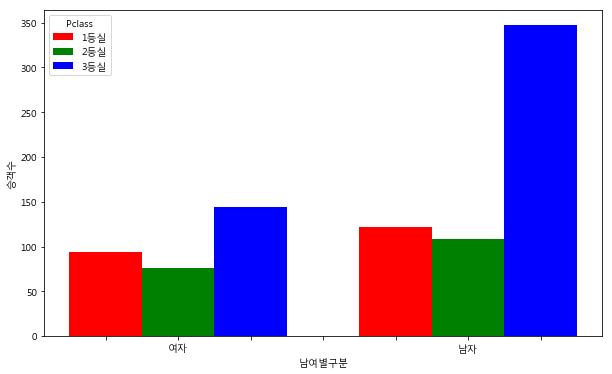

In [120]:
t1 = [ 1, 5 ]
t2 = [ 2, 6 ]
t3 = [ 3, 7 ]

plt.figure(figsize=(10,6))
plt.bar(t1, count_p1, color='r', width=1, label='1등실')
plt.bar(t2, count_p2, color='g', width=1, label='2등실')
plt.bar(t3, count_p3, color='b', width=1, label='3등실')
plt.xlabel('남여별구분')
plt.ylabel('승객수')
plt.legend(title='Pclass')

t = list(range(1,8))
plt.xticks(t , ('','여자','','','','남자',''))   # set the locations of the xticks
plt.show()

In [121]:
# count_all = count_f.copy()
count_all = [0]
count_all.extend(count_f)   
    # 데이타 하나를 추가할 때는 append를 쓰면 됐지만, 
    # 2개 이상의 여러개를 한번에 추가할 때는 extend를 사용한다.
count_all.append(0)
count_all.extend(count_m)
count_all

[0, 94, 76, 144, 0, 122, 108, 347]

<function matplotlib.pyplot.show(*args, **kw)>

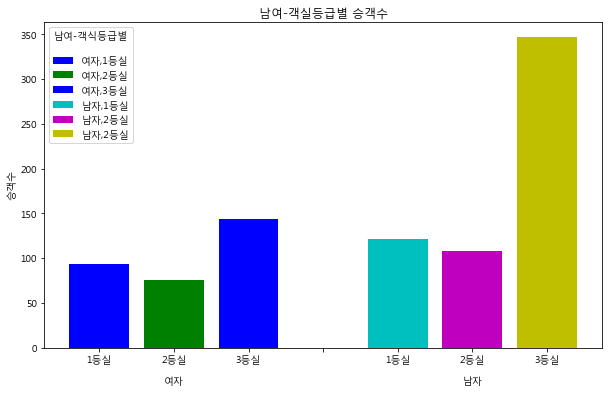

In [122]:
plt.figure(figsize=(10, 6))

colors = ['w', 'b', 'g', 'b', 'w', 'c', 'm', 'y', 'w', 'k'] # 뒤의 w, k는 range범위를 유지하기 위해 넣어준 것일뿐, 의미 없다고 봐도 된다.
labels =['', '여자,1등실', '여자,2등실', '여자,3등실', '', '남자,1등실', '남자,2등실', '남자,2등실']
# xticks = ('', '여자','','','','남자','' )
xticks = ('1등실', '2등실\n\n여자','3등실','','1등실','2등실\n\n남자','3등실' )
t = list(range(1,8))

for idx in range(1, 8):
    plt.bar(idx, count_all[idx], color=colors[idx], width=0.8, label=labels[idx])
    
plt.title('남여-객실등급별 승객수')
# plt.xlabel('남여-객실등급별')
plt.ylabel('승객수')
plt.legend(title='남여-객식등급별\n')

plt.xticks(t, xticks)  # set the locations of the xticks
plt.show

# Advanced 답안

In [123]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

### 데이터 다운로드 및 분석

In [124]:
df = pd.read_csv("data/train.csv")

In [125]:
df.head(10)      # Pclass: 객실등급, 성별, 나이, 생존 여부

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [126]:
df.groupby("Sex").size()
# goupby 명령어로 한번에 분류하여 크기를 구할 수 있다.

Sex
female    314
male      577
dtype: int64

In [127]:
df.groupby(["Sex", "Pclass"]).size()
# 2개 이상의 칼람도 분류가 가능하다.

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
dtype: int64

In [128]:
# df.Age.dropna()
# Return Series without null values

# NaN값을 제외해주는 명령어

In [129]:
# df.Age.dropna().apply(lambda x:str(x)[:1])

In [130]:
import math

In [131]:
age_series = df.Age.dropna().apply(lambda age: math.floor(age/10)*10)
# math.floor는 소수점을 날려주는 명령어다.
age_series.name = "Age_Group"

In [132]:
age_series[:10]

0     20
1     30
2     20
3     30
4     30
6     50
7      0
8     20
9     10
10     0
Name: Age_Group, dtype: int64

In [133]:
df = pd.concat([df, age_series], axis=1)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,50.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,20.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,10.0


In [134]:
? pd.concat

In [135]:
df.Age_Group = df.Age_Group.fillna("Uncategorized")
# na값에다가 "uncategorized" 값을 넣어준 것.
# fillna 명령어를 통해서 na값을 원하는 수치로 바꿀 수 있다.

In [136]:
df.Age_Group.head(10)

0               20
1               30
2               20
3               30
4               30
5    Uncategorized
6               50
7                0
8               20
9               10
Name: Age_Group, dtype: object

In [137]:
age_group_df = df.groupby("Age_Group").size()
age_group_df

Age_Group
0.0               62
10.0             102
20.0             220
30.0             167
40.0              89
50.0              48
60.0              19
70.0               6
80.0               1
Uncategorized    177
dtype: int64

In [138]:
df.groupby("Age_Group").size()

Age_Group
0.0               62
10.0             102
20.0             220
30.0             167
40.0              89
50.0              48
60.0              19
70.0               6
80.0               1
Uncategorized    177
dtype: int64

In [139]:
# df.agg : Aggregate using callable, string, dict, or list of string/callables

In [140]:
df.groupby("Pclass").agg({"Survived":"mean"})

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [141]:
df.groupby("Sex").agg({"Survived": "sum"})

,Survived
Sex,
female,233
male,109


In [142]:
233/314, 109/577

(0.7420382165605095, 0.18890814558058924)

In [143]:
pd.crosstab(
    df.Sex, # index
    df.Pclass, # columns
    margins=True,  # margins를 True값을 주면 총합을 열에 추가해준다.
)  

Pclass,1,2,3,All
Sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


In [144]:
df.pivot_table(
    "Survived",
    "Sex",
    "Pclass",     # aggfunc="mean" ( 생존률 ); ( 매출: SUM )
)

## survived가 입력되는 값, sex가 index, pclass가 columns 값으로 입력된다. 
## 근데 value의 default값은 mean으로 설정되어 있기 때문에 자동으로 생존률이 입력되는 것.

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### 참조. pandas.DataFrame.unstack()
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html

In [145]:
df.groupby(["Pclass", "Sex"]).size().unstack(1)
# unstack 옵션을 주면 자동으로 dataframe 형식으로 바꿔주는 것.

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [146]:
temp_df = df.groupby(["Pclass", "Sex"]).size().unstack(0)
temp_df

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [147]:
# temp_df.sum(axis=1)
result_df = temp_df.div(temp_df.sum(axis=1), axis=0)
# 비율을 연산하는 과정                .sum() => .div()
result_df

Pclass,1,2,3
Sex,,,
female,0.299363,0.242038,0.458599
male,0.211438,0.187175,0.601386


In [148]:
# temp_df.div
# Floating division of dataframe and other, element-wise

### 데이터 시각화

### \# matplotlib.pyplot style


In [149]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)

%matplotlib inline

In [37]:
plt.rcParams['figure.figsize']= (12, 6)

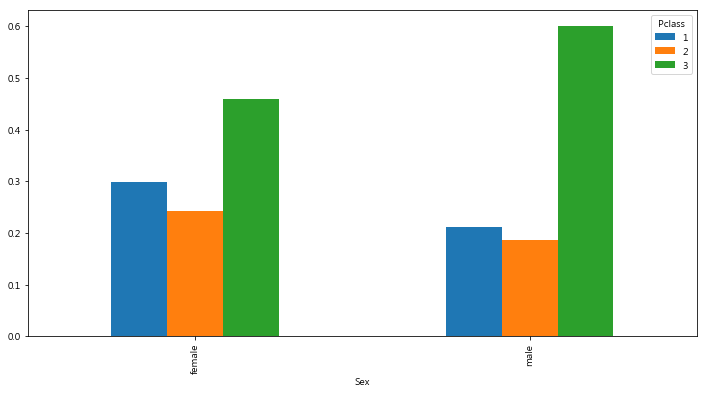

In [39]:
bar_plot = result_df.plot.bar()

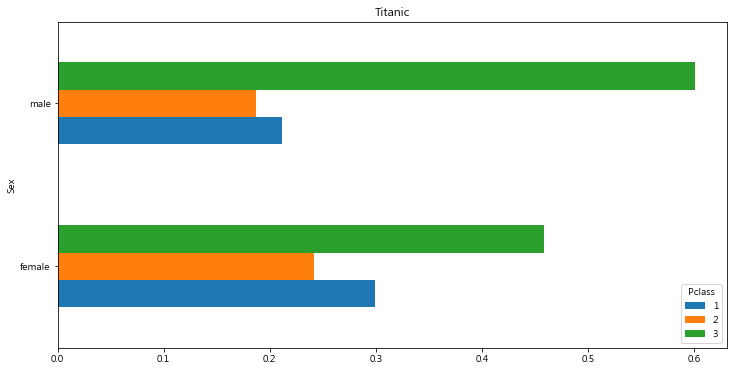

In [41]:
result_df.plot(kind="barh", title="Titanic")
# bar horizontal의 약자인 barh를 입력해주면 가로형태의 바차트가 출력된다.

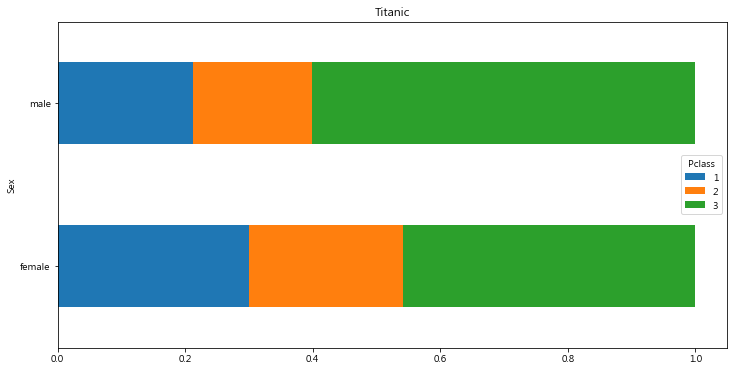

In [42]:
result_df.plot(kind='barh', title='Titanic', stacked=True)

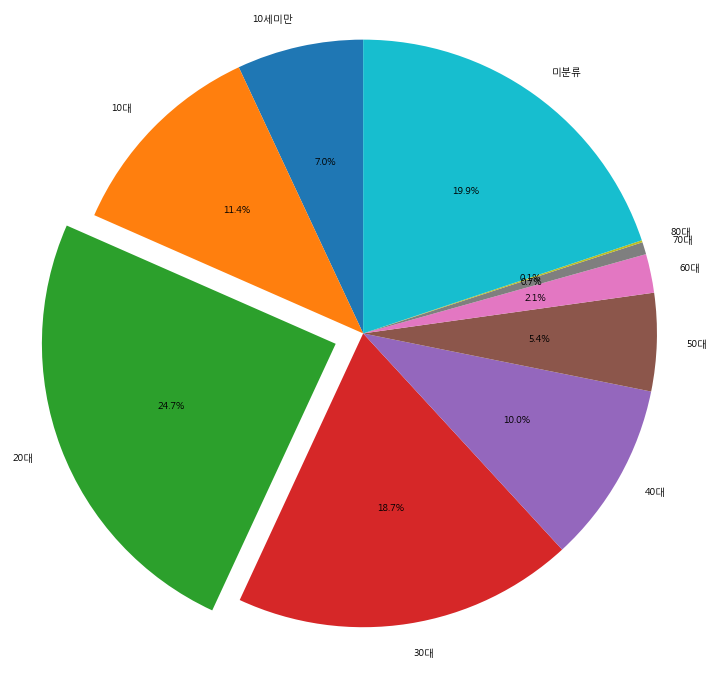

In [45]:
plt.rcParams['figure.figsize'] = (12,12)

labels = list(age_group_df.index)
labels = ['10세미만', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '미분류']
sizes  = list(age_group_df.values)
explode = (0, 0, 0.1, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

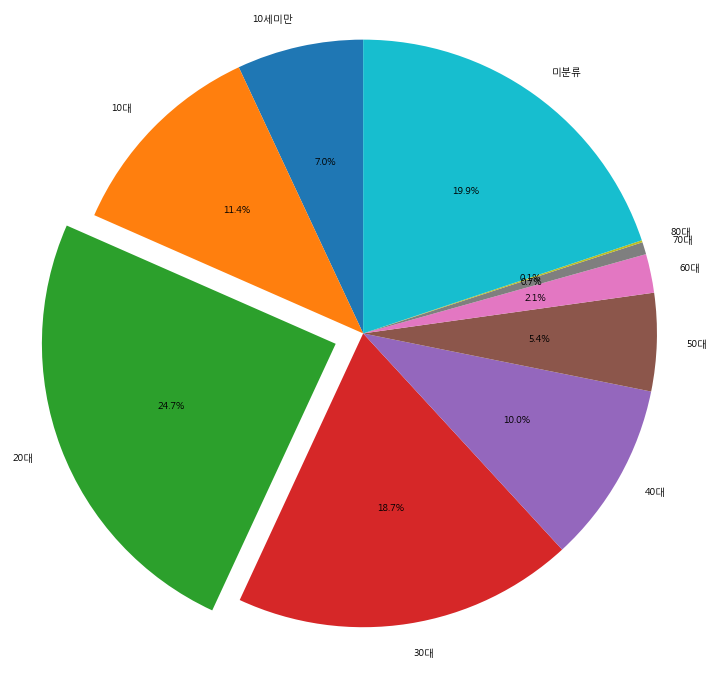

In [66]:
plt.rcParams['figure.figsize'] = (12, 12)

labels = list(age_group_df.index)
labels = ['10세미만', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '미분류']
sizes = list(age_group_df.values)
explode = (0, 0, 0.1, 0, 0, 0, 0, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')

plt.show()

In [158]:
labels = list(age_group_df.index)
labels

[0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 'Uncategorized']